In [11]:
from astropy.table import Table, Column
import time
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import sys

from scipy.stats import kde
from tqdm import tqdm

sys.path.insert(0, '../Modules')
import erqScaling
import erqMedSpec
import os

In [12]:
# Reading data from luminosity matched sample
smp=Table.read('../LumMatch/LumMatch.fits')
iW3_0 = smp['i-w3']
kt80_0= smp['kurt80_gf']
rew_0 = smp['rew_gf']
rew_0  = np.log10(rew_0)
frat_0 = smp['frat_nv/civ']
fwhm_0 = smp['fwhm_gf']
rw3_0=smp['r-w3']
rz_0=smp['r-z']
iz_0 = iW3_0 - rw3_0 + rz_0
Lum_0 = smp['Lum']
z_dr12 = smp['z_dr12']
plate = smp['Plate']
mjd = smp['MJD']
fiber =  smp['FiberID']

In [13]:
# Normalizing data + getting the center and ERQ
data_0=np.array(list(zip(iW3_0, rew_0)))
(data, minData, rangeData) =  erqScaling.MinMaxScaler(data_0)
Main_center = np.median(data, axis=0)
ERQ = data[((iW3_0>=4.6) & (rew_0>=2))]

# opening angle 
enclosing_ratio=1; resolution=1000; ngrids=200; 
opening_angle, ERQ_direction = erqMedSpec.opening_angle_finder(ERQ, Main_center, enclosing_ratio, resolution)
print('opening angle:', np.rad2deg(opening_angle))

#  Obtaining Point A and B for the ERQ wedge
x_erq, y_erq= np.median(ERQ, axis=0)  #center of ERQ population 
r_erq = np.sqrt((x_erq-Main_center[0])**2 + (y_erq-Main_center[1])**2)  # ERQ radius 
A= [0,0]
B= [0,0]
ext=1.7
A[0] = Main_center[0] + r_erq*ext*np.cos(ERQ_direction+opening_angle)
B[0] = Main_center[0] + r_erq*ext*np.cos(ERQ_direction-opening_angle)
A[1] = Main_center[1] + r_erq*ext*np.sin(ERQ_direction+opening_angle)
B[1] = Main_center[1] + r_erq*ext*np.sin(ERQ_direction-opening_angle)

opening angle: 18.52735638326578


In [14]:
# Binning with KDE density contours and expanded versions 
bw=3 # bandwidth ratio for the default value
wdg=0
dir = '2D-Analysis/'
x_erq_0 = 4.6
y_erq_0 = 2
expansion=[1.35, 1.55, 1.95]
if os.path.exists(dir)==False:
    os.system('mkdir -p ' + dir)
levels = np.array([0.03, .1, 0.3])

KDE...
binning...
plotting


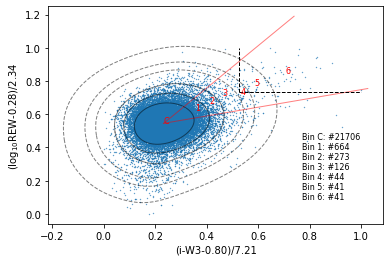

In [5]:
bin_label, bin_pop, lines = erqMedSpec.KDE_Bin2D(data, rangeData, minData, True, x_erq_0, y_erq_0,\
                                           ngrids, bw, levels, A, B, True, expansion, dir+'ERQ-wdg.png',\
                                           True, '(i-W3-%.2f)/%.2f' %(minData[0], rangeData[0]),r'(log$_{10}$REW-%.2f)/%.2f' %(minData[1], rangeData[1]), \
                                           None, True, True)

np.savetxt(dir + 'bin_label-wdg-%1d' %(wdg)+'.txt', bin_label)
np.savetxt(dir + 'bin_pop-wdg-%1d' %(wdg) +'.txt', bin_pop)

In [6]:
!cp 2D-Analysis/ERQ-wdg.png ../../erqPaper/fig

In [7]:
########## Median spectra for a wedge along ERQ vector and one along the opposit direction #####
# loading labels 
bin_label = np.loadtxt(dir + 'bin_label-wdg-%1d' %(wdg)+'.txt')
bin_pop = np.loadtxt(dir + 'bin_pop-wdg-%1d' %(wdg) +'.txt')
tip_label = np.loadtxt(dir + 'CentralBinLabel.txt')

# other bins MedSpec
nBin = np.int32(np.max(bin_label))
for b in range(nBin):
    mask = (bin_label==b+1)
    medSpec = erqMedSpec.stacker(z_dr12[mask], plate[mask], mjd[mask], fiber[mask])
    np.savetxt(dir +'med-spec-wdg-%d-bin-%d.txt' %(wdg, b), medSpec)

100%|██████████| 21706/21706 [55:37<00:00,  6.50it/s] 
/home/reza/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:995: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)
100%|██████████| 273/273 [00:41<00:00,  6.64it/s]
/home/reza/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1115: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
100%|██████████| 41/41 [00:06<00:00,  6.51it/s]


KDE...
binning...


/home/reza/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/reza/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
posx and posy should be finite values
posx and posy should be finite values


plotting


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


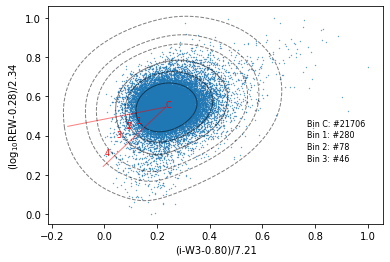

In [8]:
# Biniing Wedge-2
wdg=2
# Point A and B making the triangle that make the wedge oopsit to ERQ vector 
ext=-0.8
A= [0,0]
B= [0,0]
A[0] = Main_center[0] + r_erq*ext*np.cos(ERQ_direction+opening_angle)
B[0] = Main_center[0] + r_erq*ext*np.cos(ERQ_direction-opening_angle)
A[1] = Main_center[1] + r_erq*ext*np.sin(ERQ_direction+opening_angle)
B[1] = Main_center[1] + r_erq*ext*np.sin(ERQ_direction-opening_angle)

bin_label, bin_pop, lines = erqMedSpec.KDE_Bin2D(data, rangeData, minData, False, x_erq_0, y_erq_0,\
                                           ngrids,  bw, levels, \
                                           A, B, \
                                           True,expansion,\
                                           dir+'oppERQ-wdg.png', \
                                           True, '(i-W3-%.2f)/%.2f' %(minData[0], rangeData[0]),r'(log$_{10}$REW-%.2f)/%.2f' %(minData[1], rangeData[1]), \
                                           None, True, True)
np.savetxt(dir + 'bin_label-wdg-%1d' %(wdg)+'.txt', bin_label)
np.savetxt(dir + 'bin_pop-wdg-%1d' %(wdg) +'.txt', bin_pop)

In [9]:
!cp 2D-Analysis/oppERQ-wdg.png ../../erqPaper/fig

In [10]:
# MedSpecs of Wedge-2 
nBin = np.int32(np.max(bin_label))
for b in range(1,nBin):
    mask = (bin_label==b+1)
    medSpec = erqMedSpec.stacker(z_dr12[mask], plate[mask], mjd[mask], fiber[mask])
    np.savetxt(dir +'med-spec-wdg-%d-bin-%d.txt' %(wdg, b), medSpec)

100%|██████████| 280/280 [00:41<00:00,  6.77it/s]
/home/reza/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1115: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
100%|██████████| 2/2 [00:00<00:00,  5.83it/s]


In [11]:
# Table of properties  for ERQ wedg and oppERQ wedge
nBin=7
imw3_bin_med =[]
REW_bin_med = []
fwhm_bin_med = []
kt80_bin_med = []
frat_bin_med = []
iz_bin_med = []
Lum_bin_med = []
imw3_bin_std =[]
REW_bin_std = []
fwhm_bin_std = []
kt80_bin_std = []
frat_bin_std = []
iz_bin_std = []
Lum_bin_std = []
BinPop=[]
Wedge=[]
binNo=[]

for wdg in [0,2]:
    bin_label = np.loadtxt(dir + 'bin_label-wdg-%1d' %(wdg)+'.txt')
    bin_pop = np.loadtxt(dir + 'bin_pop-wdg-%1d' %(wdg) +'.txt')
    tip_label = np.loadtxt(dir + 'CentralBinLabel.txt')
    tip_pop= np.sum(tip_label)

    
    #  Median properties in each bin
    for b in range(1,nBin+1):
        if(b>1):
            mask = (bin_label==b)
            BinPop.append("{0:.0f}".format(bin_pop[b-1]))

        else:
            mask = (tip_label==1)
            BinPop.append("{0:.0f}".format(tip_pop))

        
        imw3_bin_med.append("{0:.2f}".format(np.median(iW3_0[mask])))
        REW_bin_med.append("{0:.0f}".format(np.median(10**rew_0[mask])))
        fwhm_bin_med.append("{0:.0f}".format(np.median(fwhm_0[mask])))
        kt80_bin_med.append("{0:.2f}".format(np.median(kt80_0[mask])))
        frat_bin_med.append("{0:.2f}".format(np.median(frat_0[mask])))
        iz_bin_med.append("{0:.2f}".format(np.median(iz_0[mask])))
        Lum_bin_med.append("{0:.2f}".format(np.median(Lum_0[mask])))
        
        imw3_bin_std.append("{0:.2f}".format(np.std(iW3_0[mask])))
        REW_bin_std.append("{0:.0f}".format(np.round(np.std(10**rew_0[mask])/100)*100))
        fwhm_bin_std.append("{0:.0f}".format(np.round(np.std(fwhm_0[mask])/100)*100))
        kt80_bin_std.append("{0:.2f}".format(np.std(kt80_0[mask])))
        frat_bin_std.append("{0:.2f}".format(np.std(frat_0[mask])))
        iz_bin_std.append("{0:.2f}".format(np.std(iz_0[mask])))
        Lum_bin_std.append("{0:.2f}".format(np.std(Lum_0[mask])))
        Wedge.append("{0:.0f}".format(wdg))
        binNo.append("{0:.0f}".format(b))

tabProperties = Table([Wedge, binNo, BinPop, imw3_bin_med,imw3_bin_std, REW_bin_med,REW_bin_std,
                       fwhm_bin_med, fwhm_bin_std, kt80_bin_med, kt80_bin_std, frat_bin_med,frat_bin_std,
                       iz_bin_med,iz_bin_std, Lum_bin_med, Lum_bin_std],
                      names=('W','B', 'N', 'i-W3','i-W3_\sigma', 'REW','REW_\sigma', 'FWHM','FWHM$_\sigma',
                             'kt80', 'kt80_\sigma', 'frat', 'frat_\sigma', 'i-z','i-z_\sigma', 'L', 'L_\sigma'))

tabProperties.write(dir+ 'All-Wedge-Properties.fits' , format='fits', overwrite=True)

/home/reza/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3332: RuntimeWarning: Mean of empty slice.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/reza/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:216: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/reza/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:185: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
/home/reza/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


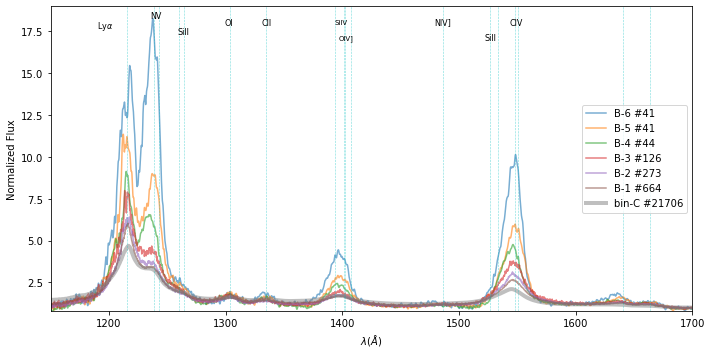

In [12]:
#ploting med spec for  wedge-1
c = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5']
dir = '2D-Analysis/'
# -----------
step = 1.00015
bb = np.arange(0,8813,1)
wgrid = 800.0 * step**bb
nw = len(bb)
wdg=0
c_ind=-1
lambda_min = 1150; lambda_max = 1700
fig = plt.figure(figsize=(11.5,5.6))
ymax=19
ymin=0.8
fs=8
fs1=7
y_median = 0.95*ymax
med_step=.8
legend_loc=7
plt.xlim(lambda_min,lambda_max)
nBin=7
x_median=lambda_min+200
# Bin C med Spec

bin_label = np.loadtxt(dir + 'bin_label-wdg-%1d' %(wdg)+'.txt')
bin_pop = np.loadtxt(dir + 'bin_pop-wdg-%1d' %(wdg) +'.txt')
tip_label = bin_pop[0]
tip_pop= np.sum(tip_label)
ind = (wgrid>lambda_min) & (wgrid<lambda_max)

from line_db import line_db
from matplotlib import cm
from scipy import ndimage

for b in reversed(range(2,nBin+1)):
    if(bin_pop[b-1]>=5):   
        medSpec=np.loadtxt(dir+ 'med-spec-wdg-%1d-bin-%1d.txt' %(wdg, b-1))
        plt.ylabel('Normalized Flux')
        plt.xlabel(r'$\lambda  (\AA)$')

        if(bin_pop[b-1]<100):
            SmoothedMedSpec = ndimage.filters.gaussian_filter1d(medSpec,2.0)
        else:
            SmoothedMedSpec = medSpec
        if(wdg==0):
            wdgl=1
        else:
            wdgl=wdg
        c_ind+=1
        plt.plot(wgrid[ind],  SmoothedMedSpec[ind], lw = 1.5, c=c[c_ind], 
                     label='B-%d #%d' %(b-1, bin_pop[b-1]), alpha=0.6)

medSpec=np.loadtxt(dir+ 'med-spec-wdg-%1d-bin-%1d.txt' %(wdg, 0))
plt.plot(wgrid[ind],  medSpec[ind], lw = 4, c='grey', 
                 label='bin-C #%d' %(tip_pop), alpha=0.5)

plt.legend(loc=7)
#     plt.title('Wedge: %d' %wdg)
line_db( ymax, fs, fs1, 3) 
fig_path = dir + 'med-spec-%d-%d-wdg-%d.png'%(lambda_min, lambda_max, wdg)
plt.ylim(ymin, ymax)
plt.savefig(fig_path, format='png', dpi=200, bbox_inches='tight')
plt.show()
!cp 2D-Analysis/med-spec-1150-1700-wdg-0.png ../../erqPaper/fig

0
1
2


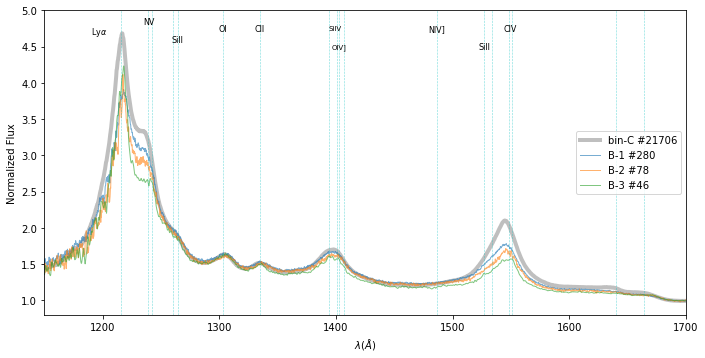

In [13]:
#ploting med spec for  wedge-2
c = ['C0', 'C1', 'C2','C3']
dir = '2D-Analysis/'
# -----------
step = 1.00015
bb = np.arange(0,8813,1)
wgrid = 800.0 * step**bb
nw = len(bb)
wdg=2
c_ind=-1
lambda_min = 1150; lambda_max = 1700
fig = plt.figure(figsize=(11.5,5.6))
ymax=5
ymin=0.8
fs=8
fs1=7
y_median = 0.95*ymax
med_step=.8
legend_loc=7
plt.xlim(lambda_min,lambda_max)

x_median=lambda_min+200
# Bin C med Spec
medSpec=np.loadtxt(dir+ 'med-spec-wdg-0-bin-0.txt')
ind = (wgrid>lambda_min) & (wgrid<lambda_max)
plt.plot(wgrid[ind],  medSpec[ind], lw = 4, c='grey', 
                 label='bin-C #%d' %(tip_pop), alpha=0.5)

bin_label = np.loadtxt(dir + 'bin_label-wdg-%1d' %(wdg)+'.txt')
bin_pop = np.loadtxt(dir + 'bin_pop-wdg-%1d' %(wdg) +'.txt')
tip_label = np.loadtxt(dir + 'CentralBinLabel.txt' )
tip_pop= np.sum(tip_label)
from line_db import line_db
from matplotlib import cm
from scipy import ndimage

for b in range(1,nBin):
    if(bin_pop[b]>=10):   
        medSpec=np.loadtxt(dir+ 'med-spec-wdg-%1d-bin-%1d.txt' %(wdg, b))
        plt.ylabel('Normalized Flux')
        plt.xlabel(r'$\lambda  (\AA)$')

        if(bin_pop[b-1]<100):
            SmoothedMedSpec = ndimage.filters.gaussian_filter1d(medSpec,2.0)
        else:
            SmoothedMedSpec = medSpec
        c_ind+=1
        print(c_ind)
        plt.plot(wgrid[ind],  SmoothedMedSpec[ind], lw = 1., c=c[c_ind], 
                     label='B-%d #%d' %(b, bin_pop[b]), alpha=0.6)
plt.legend(loc=7)
#     plt.title('Wedge: %d' %wdg)
line_db( ymax, fs, fs1, 3) 
fig_path = dir + 'med-spec-%d-%d-wdg-%d.png'%(lambda_min, lambda_max, wdg)
plt.ylim(ymin, ymax)
plt.savefig(fig_path, format='png', dpi=200, bbox_inches='tight')
!cp 2D-Analysis/med-spec-1150-1700-wdg-2.png ../../erqPaper/fig
plt.show()

In [30]:
# Finding the Boundary which makes the dippest dip
from sklearn.neighbors import LocalOutlierFactor as LOF
# setting A and B point again for ERQ wedge
A= [0,0]
B= [0,0]
ext=1.7
levels = np.array([0.03, .1, 0.3])
A[0] = Main_center[0] + r_erq*ext*np.cos(ERQ_direction+opening_angle)
B[0] = Main_center[0] + r_erq*ext*np.cos(ERQ_direction-opening_angle)
A[1] = Main_center[1] + r_erq*ext*np.sin(ERQ_direction+opening_angle)
B[1] = Main_center[1] + r_erq*ext*np.sin(ERQ_direction-opening_angle)
nBin=7
max_diff = -100
for i in tqdm(range(-10, 11)):
        expansion=[1.35+0.01*i, 1.55+0.01*i, 1.95]

        bin_label, bin_pop, lines = erqMedSpec.KDE_Bin2D(data, rangeData, minData, False, 0, 0,
                                          200,  3, levels, A, B, True, expansion,'', False, '','' ,'', False, False)
 

        for k in [40]:
            clf= LOF(n_neighbors=k,  n_jobs=-1)
            clf.fit_predict(data)
            LOFScores= -clf.negative_outlier_factor_
            LOFScoresMed=np.zeros([nBin])
            #  Median properties in each bin
            for b in range(nBin):
                mask = (bin_label==b+1)
                LOFScoresMed[b] =np.median(LOFScores[mask])

            if ((LOFScoresMed[3]-LOFScoresMed[4])>max_diff):
                max_diff = LOFScoresMed[3]-LOFScoresMed[4]
                min_LOF_B4 = LOFScoresMed[3]
                max_LOF_B5 = LOFScoresMed[4]
                plt.plot(['C', '1', '2', '3', '4', '5', '6'], LOFScoresMed, ls='--', lw=1, alpha=0.5 ,markersize=5, marker='o', 
                                                     label=r'b-5=#%d-%d $\Delta^{3-4}_{LOF}=$%.3f'%(bin_pop[4], LOFScoresMed[3]-LOFScoresMed[4]))
                plt.title('exp:[%f, %f]'%(expansion[0], expansion[1]))
                plt.legend()
                plt.savefig('bin-lof-test-%.2f-%.2f.png'%(expansion[0], expansion[1]))
                i_max=i
print(i_max,k_max, max_diff)

100%|██████████| 21/21 [17:01<00:00, 48.64s/it]

-7 -2 40 0.032646632537026266


In [21]:
i_max=-7
expansion_best = [1.35+i_max*0.01, 1.55+i_max*0.01, 1.95]

In [22]:
# we can deside about the inner and outer boundary by comparing new erqs with old ones

-1

In [ ]:
# # PDF for LOF score in each bin for different k
# # best expanxion form previous step 
# i_min=1
# j_min=0
# dir ='2D-Analysis/'
# # expansion = [1.25+i_min*0.01, 1.54+j_min*0.01, 1.95]
# expansion = [1.35, 1.55, 1.95]
# bin_label, bin_pop, lines = erqMedSpec.KDE_Bin2D(data, rangeData, minData, False, 0, 0,
#                                           50,  3, levels, A, B, True, expansion,'', False, '','' ,'', False, False)
# from sklearn.neighbors import LocalOutlierFactor as LOF
# cc=-1
# from matplotlib import cm
# c = cm.get_cmap('jet',5)
# nBin=7
# nContours = nBin -1
# nBoot=100
# nSample =len(data)
# jitter_x = 0.1
# jitter_y = 0.1
# (data, minData, rangeData) =  erqScaling.MinMaxScaler(data_0)

# def check_in(lines, points):
#     from  matplotlib import path
    
#     p = path.Path(lines)
#     flag = p.contains_points(points)
#     return flag


# for k in [30]:
#     print(k)
#     DistLOFMedBin=np.zeros([nBoot, nBin])
#     for s in tqdm(range(nBoot)):
# #         LOFScores_boot = np.zeros([nSample])
#         rand_ind = np.random.choice(range(len(iW3_0)), nSample, replace=False)
#         dx_noise = np.random.normal(0, jitter_x,nSample)
#         dy_noise = np.random.normal(0, jitter_y,nSample)
#         Boot_sample= np.zeros([len(data),2])
#         Boot_sample, dummy, dummy = erqScaling.MinMaxScaler(data_0)
#         x_noise = data[rand_ind,0] + dx_noise
#         y_noise = data[rand_ind,1] +dy_noise
#         Boot_sample[rand_ind,:] = np.vstack((x_noise,y_noise)).T
                
            
#         clf= LOF(n_neighbors=k, n_jobs=8)
#         clf.fit_predict(Boot_sample)
#         LOFScores_boot = -clf.negative_outlier_factor_
#         for b in range(nBin):
#             if(b==0):
#                 mask = check_in(lines[nContours-1], Boot_sample)
#             if (0<b<nBin-1):
#                 mask_outer = check_in(lines[nContours-1-b], Boot_sample)
#                 mask_inner = check_in(lines[nContours-b], Boot_sample)
#                 mask_tri= check_in(list([A,B,list(Main_center)]), Boot_sample)
#                 mask = ~mask_inner & mask_outer & mask_tri
#             if (b==nBin-1):
#                 mask_outer = check_in(lines[nContours-b], Boot_sample)
#                 mask_tri= check_in(list([A,B,list(Main_center)]), Boot_sample)
#                 mask =~mask_outer & mask_tri
#             DistLOFMedBin[s,b] = np.mean(LOFScores_boot[mask])
#     np.savetxt(dir+'DistLOFMedBin-k-%d.dat'%k,DistLOFMedBin)

In [ ]:
# plt.scatter(Boot_sample[rand_ind,0], Boot_sample[rand_ind,1], alpha=0.1, s=2, c='b')

# plt.scatter(data[rand_ind,0], data[rand_ind,1], alpha=0.1, s=2, c='r')


In [ ]:
# # Histogram of BootStrap sampling of LOF in different bins and nearest neighbours  
# nBin=7
# bin_label = np.loadtxt('2D-Analysis/bin_label-wdg-0.txt')
# for k in [30]:
#     DistLOFMedBin = np.loadtxt(dir+'DistLOFMedBin-k-%d.dat'%k)
#     clf= LOF(n_neighbors=k,  n_jobs=-1)
#     clf.fit_predict(data)
#     LOFScores= -clf.negative_outlier_factor_
#     for b in range(nBin):
#         plt.hist(DistLOFMedBin[:,b], bins=10, density=True, label='B-%d'%(b+1), alpha=0.5)
#         plt.axvline(x=np.mean(LOFScores[bin_label==b+1]), ls='-', c='k', alpha=1, label='meanReal')
#         plt.axvline(x=np.median(LOFScores[bin_label==b+1]), ls='-', c='g', alpha=1, label='MedReal')
# #         plt.axvline(x=np.mean(DistLOFMedBin[:,b]), ls='--', c='c', alpha=1, label='meanBoot')
#         plt.axvline(x=np.median(DistLOFMedBin[:,b]), ls='--', c='C6', alpha=1, label='medianBoot')
#         u= np.percentile(DistLOFMedBin[:,b], 95) 
#         l = np.percentile(DistLOFMedBin[:,b], 5)
#         plt.axvline(x=l, c='y', label='l')
#         plt.axvline(x=u, c='y', label='u')
#         plt.title('k:%d l-u=%.2e'%(k, u-l))
#         plt.legend()
# #         plt.savefig('bin-%d.png'%(b+1))
#         plt.show()
            


In [ ]:
# # Getting CI for each bin's Medain LOF for different k
# bin_label = np.loadtxt('2D-Analysis/bin_label-wdg-0.txt')
# # for k in [40, 50, 100, 150]:
# for k in [200]:
#     DistLOFMedBin = np.loadtxt('2D-Analysis/DistLOFMedBin-k-%d.dat'%k)
#     l=np.zeros(nBin)
#     u=np.zeros(nBin)
#     med=np.zeros(nBin)
#     fift_per=np.zeros(nBin)
#     clf= LOF(n_neighbors=k,  n_jobs=-1)
#     clf.fit_predict(data)
#     LOFScores= -clf.negative_outlier_factor_
#     LOFScoresMean=np.zeros([nBin])
#     #  Median properties in each bin
#     for b in range(nBin):
#         mask = (bin_label==b+1)
#         LOFScoresMean[b] =np.mean(LOFScores[mask])
#         l[b] = np.percentile(DistLOFMedBin[:,b], 32)
#         u[b] = np.percentile(DistLOFMedBin[:,b], 68)
# #         med[b] = np.median(DistLOFMedBin[:,b])
#         fift_per[b] = np.percentile(DistLOFMedBin[:,b], 50)
        
#         print("k:%d b:%d l:%.3f u:%.3f <LOF>:%.3f 50q:%.3f"%(k,b, 
#                                         l[b],u[b], LOFScoresMean[b], fift_per[b]))
#     print('')


In [ ]:
# # Getting CI for each bin's Medain LOF for different k
# bin_label = np.loadtxt('2D-Analysis/bin_label-wdg-0.txt')
# # for k in [40, 50, 100, 150]:
# for k in [40]:
#     DistLOFMedBin = np.loadtxt('2D-Analysis/DistLOFMedBin-95p-k-%d.dat'%k)
#     l=np.zeros(nBin)
#     u=np.zeros(nBin)
#     mm=np.zeros(nBin)
#     clf= LOF(n_neighbors=k,  n_jobs=-1)
#     clf.fit_predict(data)
#     LOFScores= -clf.negative_outlier_factor_
#     LOFScoresMed=np.zeros([nBin])
#     #  Median properties in each bin
#     for b in range(nBin):
#         mask = (bin_label==b+1)
#         LOFScoresMed[b] =np.median(LOFScores[mask])
#         u[b]= np.percentile(DistLOFMedBin[:,b], 95) 
#         l[b] = np.percentile(DistLOFMedBin[:,b], 5)
#         mm[b] = np.percentile(DistLOFMedBin[:,b], 50)
#         print("k:%d b:%d l:%.3f u:%.3f mean:%.3f mm:%.3f"%(k,b, l[b],u[b], LOFScoresMed[b], mm[b]))
#     print('')


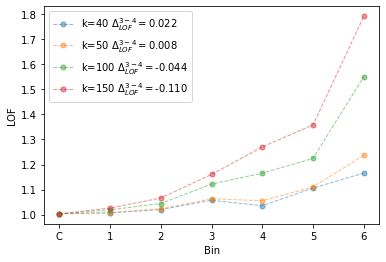

In [7]:
# median LOF plot for the intitial geuss bins  
bin_label_ini = np.loadtxt(dir + 'bin_label-wdg-0.txt')
c = ['grey', 'C0', 'C1', 'C2', 'C3', 'C4', 'C6']
from scipy import stats 
from sklearn.neighbors import LocalOutlierFactor as LOF
cind=-1
nBin = np.int32(np.max(bin_label_ini))
for k in [40, 50, 100, 150]:
# for k in [30]:
    cind+=1
#     DistLOFMedian = np.loadtxt('100-Sample2DLOFMedBin-k-%d.dat'%k)
    clf= LOF(n_neighbors=k,  n_jobs=-1)
    clf.fit_predict(data)
    LOFScores= -clf.negative_outlier_factor_
#     LOFScoreMedian=np.zeros([nBin])                       
#     l = np.zeros([nBin])
#     u = np.zeros([nBin])
#     el = np.zeros([nBin])
#     eu = np.zeros([nBin])
    medianLOF = np.zeros([nBin])
    for b in range(nBin):
#         mean, var, std = stats.bayes_mvs(DistLOFMeBin[:,b], alpha=0.99)
#         meanLOF[b] = mean[0]
#         l[b],u[b] = mean[1]
#         l[b]=meanLOF[b] - l[b] 
#         u[b]=u[b] - meanLOF[b]
        medianLOF[b] = np.median(LOFScores[bin_label_ini==b+1])
       
#         eu[b] = np.percentile(DistLOFMeBin[:,b], 95) - meanLOF[b]
#         el[b] = meanLOF[b]- np.percentile(DistLOFMeBin[:,b], 5)
#         print(k,b,abs(u[b]-eu[b])/u[b])
#         print(k,b,abs(l[b]-el[b])/l[b])
#         if(b==0): mask = (tip_label==1)
#         if(b>0): mask = (bin_label==b+1)
        
           
#         LOFScoreMedian[b] = np.median(LOFScores[mask])

#     plt.errorbar(['C', '1', '2', '3', '4', '5', '6'], LOFScoreMedian, 
#                  yerr=e,marker='o', lw=2, ls='-',
#              markersize=2, alpha =0.6, label='k=%d'%k, c=c[cind])                       
    plt.plot(['C', '1', '2', '3', '4', '5', '6'], medianLOF, ls='--', lw=1, alpha=0.5 ,markersize=5, marker='o', 
             label=r'k=%d $\Delta^{3-4}_{LOF}=$%.3f'%(k, medianLOF[3]-medianLOF[4]))
#     , 
#                  yerr=l, uplims=False, lolims=True ,marker='o', lw=1, ls='--',
#              markersize=2, alpha =0.6, label='k=%d'%k, c=c[cind])
#     plt.errorbar(['C', '1', '2', '3', '4', '5', '6'], LOFScoreMedian, 
#                  yerr=u, lolims=False, uplims=True, marker='o', lw=1, ls='--',
#              markersize=2, alpha =0.6, c=c[cind])

plt.legend()
plt.xlabel('Bin')
plt.ylabel('LOF')
# plt.title('K=%d'%k)
plt.savefig(dir+'2d-LOF-bins-ini.png', dpi=200, format='png')
plt.show()

In [22]:
# bin label and contours for the best expansion 
bin_label_best, bin_pop_best, lines_best = erqMedSpec.KDE_Bin2D(data, rangeData, minData, False, 0, 0,
                                          200,  3, levels, A, B, True, expansion_best,'', False, '','' ,'', False, True)

np.savetxt(dir + 'bin_label_best-wdg-0.txt', bin_label_best)
# np.savetxt(dir+'lines_best.dat', lines_best)

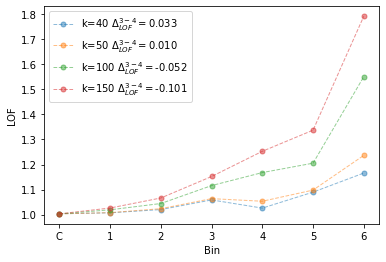

In [25]:
# median LOF plot for the best bins  
bin_label_best = np.loadtxt(dir + 'bin_label_best-wdg-0.txt')
c = ['grey', 'C0', 'C1', 'C2', 'C3', 'C4', 'C6']
from scipy import stats 
from sklearn.neighbors import LocalOutlierFactor as LOF
cind=-1
nBin = np.int32(np.max(bin_label_best))
for k in [ 40, 50, 100, 150]:
# for k in [30]:
    cind+=1
#     DistLOFMedian = np.loadtxt('100-Sample2DLOFMedBin-k-%d.dat'%k)
    clf= LOF(n_neighbors=k,  n_jobs=-1)
    clf.fit_predict(data)
    LOFScores= -clf.negative_outlier_factor_
#     LOFScoreMedian=np.zeros([nBin])                       
#     l = np.zeros([nBin])
#     u = np.zeros([nBin])
#     el = np.zeros([nBin])
#     eu = np.zeros([nBin])
    medianLOF = np.zeros([nBin])
    for b in range(nBin):
#         mean, var, std = stats.bayes_mvs(DistLOFMeBin[:,b], alpha=0.99)
#         meanLOF[b] = mean[0]
#         l[b],u[b] = mean[1]
#         l[b]=meanLOF[b] - l[b] 
#         u[b]=u[b] - meanLOF[b]
        medianLOF[b] = np.median(LOFScores[bin_label_best==b+1])
       
#         eu[b] = np.percentile(DistLOFMeBin[:,b], 95) - meanLOF[b]
#         el[b] = meanLOF[b]- np.percentile(DistLOFMeBin[:,b], 5)
#         print(k,b,abs(u[b]-eu[b])/u[b])
#         print(k,b,abs(l[b]-el[b])/l[b])
#         if(b==0): mask = (tip_label==1)
#         if(b>0): mask = (bin_label==b+1)
        
           
#         LOFScoreMedian[b] = np.median(LOFScores[mask])

#     plt.errorbar(['C', '1', '2', '3', '4', '5', '6'], LOFScoreMedian, 
#                  yerr=e,marker='o', lw=2, ls='-',
#              markersize=2, alpha =0.6, label='k=%d'%k, c=c[cind])                       
    plt.plot(['C', '1', '2', '3', '4', '5', '6'], medianLOF, ls='--', lw=1, alpha=0.5 ,markersize=5, marker='o', 
             label=r'k=%d $\Delta^{3-4}_{LOF}=$%.3f'%(k, medianLOF[3]-medianLOF[4]))
#     , 
#                  yerr=l, uplims=False, lolims=True ,marker='o', lw=1, ls='--',
#              markersize=2, alpha =0.6, label='k=%d'%k, c=c[cind])
#     plt.errorbar(['C', '1', '2', '3', '4', '5', '6'], LOFScoreMedian, 
#                  yerr=u, lolims=False, uplims=True, marker='o', lw=1, ls='--',
#              markersize=2, alpha =0.6, c=c[cind])

plt.legend()
plt.xlabel('Bin')
plt.ylabel('LOF')
# plt.title('K=%d'%k)
plt.savefig(dir+'2d-LOF_bins_best.png', dpi=200, format='png', bbox_inches='tight')
plt.show()

In [26]:
!cp 2D-Analysis/2d-LOF_bins_best.png ../../erqPaper/fig

In [3]:
#  Mock LOF 2G
from sklearn.neighbors import LocalOutlierFactor as LOF
cc=-1
from matplotlib import cm
nBoot=1000
nBin=8
k=50
outG1=[]
outG2=[]
cG2=[]
LOFScoresMedianBins=np.zeros([nBoot,nBin])
opening_angle= np.deg2rad(20)
ERQ_Vector = np.array([1,1])/np.sqrt(2)
#  Obtaining Point A and B for the ERQ wedge
rin=[0, 0.5,1,1.5,2, 2.5, 3.5,4.5]
rout=[0.5,1,1.5, 2, 2.5, 3.5, 4.5, 7]
jj=-1
for k in [70, 100, 150, 200]:
    for s in tqdm(range(nBoot)):

        # Grawing two Gaussian samples
        (data, G1, G2)=sampler([0,0], [[1,0],[0,1]], [3,3], [[1,0],[0,1]], 30000, 200)


        data_norm = erqMedSpec.vectors_uniter(data)
        clf= LOF(n_neighbors=k,  n_jobs=-1)
        clf.fit_predict(data)
        LOFScores = -clf.negative_outlier_factor_
        theta = np.zeros([len(data)])
        for i in range(len(data)):
            theta[i] = np.arccos(np.dot(ERQ_Vector, data_norm[i,:]))

        # initializing 
        r2 = data[:,0]**2 + data[:,1]**2
        for b in range(nBin):
            mask =(r2>=rin[b]**2) & (r2<=rout[b]**2) & (theta<=opening_angle)
            if(np.sum(mask)==0):
                LOFScoresMedianBins[s,b]=np.nan
            else:
                LOFScoresMedianBins[s,b]=np.median(LOFScores[mask])
    np.savetxt('2D-LOFScoresMedianBins-1000Sample-k-%d.dat'%k, LOFScoresMedianBins)                 
print(np.median(cG2)    , np.median(outG2), np.median(outG1))

  9%|▊         | 87/1000 [01:41<17:48,  1.17s/it]


KeyboardInterrupt: 

100%|██████████| 7/7 [00:00<00:00, 899.82it/s]


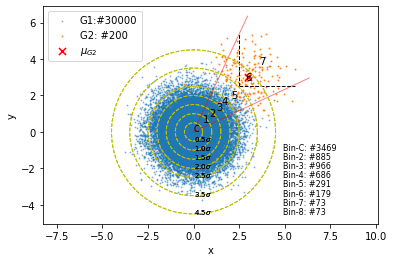

In [9]:
# plotting one example mock bin
rin=[0, 0.5,1,1.5,2, 2.5, 3.5,4.5]
rout=[0.5,1,1.5, 2, 2.5, 3.5, 4.5, 7]
A= [0,0]
B= [0,0]
r = rout[-1]
A[0] = r*np.cos(np.deg2rad(65))
B[0] = r*np.cos(np.deg2rad(25))
A[1] = r*np.sin(np.deg2rad(65))
B[1] = r*np.sin(np.deg2rad(25))
plt.plot([0, A[0] ], [0, A[1]], ls='-', c='r', alpha=0.5, lw=1)
plt.plot([0, B[0]  ], [0, B[1]], ls='-', c='r', alpha=0.5, lw=1)

(data, G1, G2)=sampler([0,0], [[1,0],[0,1]], [3,3], [[1,0],[0,1]], 30000, 200)
theta = np.zeros([len(data)])
data_norm = erqMedSpec.uniter(data)
for i in tqdm(range(len(data))):
    theta[i] = np.arccos(np.dot(np.array([1,1])/np.sqrt(2), data_norm[i,:]))
plt.plot([2.5, max(data[:,0])], [2.5, 2.5], ls='--', c='black', lw=1)
plt.plot([2.5,2.5], [2.5, max(data[:,1])], ls='--', c='black', lw=1)
plt.scatter(G1[:,0], G1[:,1], s=1, alpha=0.4, label='G1:#30000')
plt.scatter(G2[:,0], G2[:,1], s=1, alpha=0.8, c='C1', label='G2: #200')
plt.scatter(3,3,s=50, c='r', marker='x', label=r'$\mu_{G2}$')


from matplotlib.patches import Circle
from matplotlib.collections import PatchCollection

circles=[]
t= np.linspace(0,2*np.pi, 1000)
for i in tqdm(range(len(rout)-1)):
    x = rout[i]*np.cos(t)
    y = rout[i]*np.sin(t)
    if(i>=3): plt.plot(x,y, c='y',  lw=1, ls='--')
    if(i<3): plt.plot(x,y, c='y',  lw=1, ls='--')
    plt.annotate(r'%.1f$\sigma$'%rout[i], (0,-rout[i]-0.01), fontsize=7, c='k')

plt.ylabel('y')
plt.xlabel('x')
    
from matplotlib.patches import Circle
from matplotlib.collections import PatchCollection

circles=[]
t= np.linspace(0,2*np.pi, 1000)
for i in tqdm(range(len(rout)-1)):
    x = rout[i]*np.cos(t)
    y = rout[i]*np.sin(t)
    if(i>=3): plt.plot(x,y, c='y',  lw=1, ls='--')
    if(i<3): plt.plot(x,y, c='y',  lw=1, ls='--')
    plt.annotate(r'%.1f$\sigma$'%rout[i], (0,-rout[i]-0.01), fontsize=7, c='k')

r2 = data[:,0]**2 + data[:,1]**2
for b in range(len(rin)):  
        if(b>0):
            mask =(r2>=rin[b]**2) & (r2<=rout[b]**2) & (theta<=np.deg2rad(20))
            plt.text(np.median(data[mask,0]), np.median(data[mask,1]), '%d'%b)
            plt.text(4.9, -1-b*.5, 'Bin-%d: #%d'%(b+1, np.sum(mask)),fontsize=8, color='k')
        else:
            mask =(r2>=rin[b]**2) & (r2<=rout[b]**2)            
            plt.text(4.9, -1, 'Bin-C: #%d'%np.sum(mask), fontsize=8, color='black' )
            plt.text(np.median(data[:,0]), np.median(data[:,1]), 'C', fontsize=8, color='k')
# if(expansion_handle==True): plt.title(str(round(expansion[0],1))+', '+ str(round(expansion[1],1))+ ', ' + str(round(expansion[2],1)))
plt.axis('equal')
plt.legend(loc='upper left')
plt.savefig('Bin-Mock-LOF-2D.png', bbox_inches='tight', format='png', dpi=200)
plt.show()

In [ ]:
# Histrogram of Mock 2G LOF
A= [0,0]
B= [0,0]
r=7 # length of the wedge is 4sigma


plt.plot([2.5, max(data[:,0])], [2.5, 2.5], ls='--', c='black', lw=1)
plt.plot([2.5,2.5], [2.5, max(data[:,1])], ls='--', c='black', lw=1)
plt.scatter(G1[:,0], G1[:,1], s=1, alpha=0.4, label='G1:#30000')
plt.scatter(G2[:,0], G2[:,1], s=1, alpha=0.8, c='C1', label='G2: #200')
plt.scatter(3,3,s=50, c='r', marker='x', label=r'$\mu_{G2}$')
from scipy import stats 
for k in [ 40, 50, 100, 150]:
    LOFScoresMedianBins = np.loadtxt('2D-LOFScoresMedianBins-1000Sample-k-%d.dat'%k)
    print(LOFScoresMedianBins.shape)
    P_all =[]
    med_bin=[]
    width= []

    for b in range(nBin):
        N, bins, patch=plt.hist(LOFScoresMedianBins[:,b], bins=10)
        med_bin.append((bins[:-1] + bins[1:])/2)
        width.append(bins[1] - bins[0])
        P_all.append(N/np.sum(N))
        plt.clf()
        plt.cla()

    for b in range(5,nBin):
        plt.bar(med_bin[b], P_all[b], width=width[b],  linewidth=0.5, 
                alpha=.5, label=r'k=%d Bin %d: %.1f$\sigma$<r<%.1f$\sigma$'%(k, b, r1[b],r2[b]))
        u= np.percentile(LOFScoresMedianBins[:,b], 95) 
        l= np.percentile(LOFScoresMedianBins[:,b], 5) 
        plt.axvline(x=l, c='c', ls='--')
        plt.axvline(x=u, c='c', ls='--')
    plt.legend()
    plt.title('k=%d'%k)
    plt.savefig('LOF_MOK_PDF-k-%d.png'%k, dpi=200)
    plt.show()


In [ ]:
# Plotting 2D Mock LOF error bars 
r1=[0, 0.5,1,1.5,2, 2.5, 3.5,4.5]
r2=[0.5,1,1.5, 2, 2.5, 3.5, 4.5, 7]
from scipy import stats 
P_all =[]
med_bin=[]
width= []
c= ['C0', 'C1', 'C2', 'C3', 'C4']
cind=-1
for k in [50,70,100,150]:
    DistLOFMedBin = np.loadtxt('2D-LOFScoresMedianBins-1000Sample-k-%d.dat'%k)
    l, u, LOFScoreMedian = np.zeros(nBin),  np.zeros(nBin),  np.zeros(nBin)
    for b in range(nBin):
        
        l[b]= np.percentile(DistLOFMedBin[:,b],32)
        u[b]= np.percentile(DistLOFMedBin[:,b],68)
        LOFScoreMedian[b] = np.median(DistLOFMedBin[:,b])       
        u[b]=u[b] - LOFScoreMedian[b]
        l[b]=LOFScoreMedian[b] - l[b]
        print('k=%d b=%d l=%.3e m=%.3e u=%.3e'%(k, b, l[b],LOFScoreMedian[b],u[b]))
    print('')
    cind+=1
    plt.errorbar(['C', '1', '2', '3', '4', '5', '6','7'], LOFScoreMedian, 
                 yerr=l, uplims=False, lolims=True, marker='o', lw=1, ls='--',
             markersize=2, alpha =0.6, label='k=%d'%k, c=c[cind])
    plt.errorbar(['C', '1', '2', '3', '4', '5', '6','7'], LOFScoreMedian, 
                 yerr=u, uplims=True, lolims=False, marker='o', lw=1, ls='--',
             markersize=1, alpha =0.6, c=c[cind])
plt.xlabel('Bin')
plt.legend()
plt.savefig('LOF_MOK_2D-errorbar.png', dpi=200)
plt.show()


In [ ]:
#  Mock Sample of 1 Gaussian distribution for verifying False Positve Rate
cc=-1
nBoot=1000
nBin=8
LOFScoresMedianBins=np.zeros([nBoot,nBin])
opening_angle= np.deg2rad(20)
ERQ_Vector = np.array([1,1])/np.sqrt(2)
#  Obtaining Point A and B for the ERQ wedge
rin=[0, 0.5,1,1.5,2, 2.5, 3.5,4.5]
rout=[0.5,1,1.5, 2, 2.5, 3.5, 4.5, 7]
jj=-1
for k in [70, 100, 150, 200]:
    for s in tqdm(range(nBoot)):

        # Grawing two Gaussian samples
        data=np.random.multivariate_normal([0,0], [[1,0],[0,1]], 30000)

        data_norm = erqMedSpec.vectors_uniter(data)
        clf= LOF(n_neighbors=k,  n_jobs=-1)
        clf.fit_predict(data)
        LOFScores = -clf.negative_outlier_factor_
        theta = np.zeros([len(data)])
        for i in range(len(data)):
            theta[i] = np.arccos(np.dot(ERQ_Vector, data_norm[i,:]))

        # initializing 
        r2 = data[:,0]**2 + data[:,1]**2
        for b in range(nBin):
            mask =(r2>=rin[b]**2) & (r2<=rout[b]**2) & (theta<=opening_angle)
            if(np.sum(mask)==0):
                LOFScoresMedianBins[s,b]=np.nan
            else:
                LOFScoresMedianBins[s,b]=np.median(LOFScores[mask])
    np.savetxt('2D-G1-LOFScoresMedianBins1000-k-%d.dat'%k, LOFScoresMedianBins)


 86%|████████▌ | 862/1000 [11:44<02:14,  1.03it/s]

In [ ]:
#  Plotting the histrogram of Median LOF in each bins of 1G Mock data sets
r1=[0, 0.5,1,1.5,2, 2.5, 3.5,4.5]
r2=[0.5,1,1.5, 2, 2.5, 3.5, 4.5, 7]
from scipy import stats 
for k in [ 40, 50, 100, 150]:
    LOFScoresMedianBins = np.loadtxt('2D-G1-LOFScoresMedianBins1000-k-%d.dat'%k)
    print(LOFScoresMedianBins.shape)
    P_all =[]
    med_bin=[]
    width= []

    for b in range(nBin):
        N, bins, patch=plt.hist(LOFScoresMedianBins[:,b], bins=10)
        med_bin.append((bins[:-1] + bins[1:])/2)
        width.append(bins[1] - bins[0])
        P_all.append(N/np.sum(N))
        plt.clf()
        plt.cla()

    for b in range(5,nBin):
        plt.bar(med_bin[b], P_all[b], width=width[b],  linewidth=0.5, 
                alpha=.5, label=r'k=%d Bin %d: %.1f$\sigma$<r<%.1f$\sigma$'%(k, b, r1[b],r2[b]))
        u= np.percentile(LOFScoresMedianBins[:,b], 95) 
        l= np.percentile(LOFScoresMedianBins[:,b], 5) 
        plt.axvline(x=l, c='c', ls='--')
        plt.axvline(x=u, c='c', ls='--')
    plt.legend()
    plt.title('k=%d'%k)
    plt.savefig('LOF_1G_MOK_PDF-k-%d.png'%k, dpi=200)
    plt.show()

In [ ]:
# Plotting 2D Mock LOF error bars for 1 G Mock data
r1=[0, 0.5,1,1.5,2, 2.5, 3.5,4.5]
r2=[0.5,1,1.5, 2, 2.5, 3.5, 4.5, 7]
from scipy import stats 
P_all =[]
med_bin=[]
width= []
c= ['C0', 'C1', 'C2', 'C3', 'C4']
cind=-1
for k in [50,70,100,150]:
    LOFScoresMedianBins=np.loadtxt('2D-G1-LOFScoresMedianBins1000-k-%d.dat'%k)
    l, u, LOFScoreMedian = np.zeros(nBin),  np.zeros(nBin),  np.zeros(nBin)
    for b in range(nBin):
        
        l[b]= np.percentile(DistLOFMedBin[:,b],32)
        u[b]= np.percentile(DistLOFMedBin[:,b],68)
        LOFScoreMedian[b] = np.median(DistLOFMedBin[:,b])       
        u[b]=u[b] - LOFScoreMedian[b]
        l[b]=LOFScoreMedian[b] - l[b]
        print('k=%d b=%d l=%.3e m=%.3e u=%.3e'%(k, b, l[b],LOFScoreMedian[b],u[b]))
    print('')
    cind+=1
    plt.errorbar(['C', '1', '2', '3', '4', '5', '6','7'], LOFScoreMedian, 
                 yerr=l, uplims=False, lolims=True, marker='o', lw=1, ls='--',
             markersize=2, alpha =0.6, label='k=%d'%k, c=c[cind])
    plt.errorbar(['C', '1', '2', '3', '4', '5', '6','7'], LOFScoreMedian, 
                 yerr=u, uplims=True, lolims=False, marker='o', lw=1, ls='--',
             markersize=1, alpha =0.6, c=c[cind])
plt.xlabel('Bin')
plt.legend()
plt.savefig('LOF_MOK_2D-G1-errorbar.png', dpi=200)
plt.show()


In [27]:
# finding intersection point of the 
nSegment = 1000
l = lines_best[2]
ERQ_line = np.zeros([nSegment,2])
ERQ_line[:,0] = np.linspace(Main_center[0], A[0], nSegment)
ERQ_vector = np.median(ERQ) - Main_center
# y = m(x-x0)+y0 x0,y0 -> main_center m-> prep. to ERQ_vec
ERQ_line[:,1] = ERQ_vector[1]/ERQ_vector[0]*(ERQ_line[:,0] - Main_center[0]) + Main_center[1] 
P_intersect =[0,0]
minD=10000

P_intersect = erqMedSpec.intersection_finder(ERQ_line, l)
print(P_intersect)
## Inter section with line MainCenter-A and the line of Maincenter-B
Prep_ERQ_Line = np.zeros([nSegment,2])
Prep_ERQ_Line[:,0] = np.linspace((4-minData[0])/rangeData[0], (5-minData[0])/rangeData[0], nSegment)
Prep_ERQ_Line[:,1] = -ERQ_vector[0]/ERQ_vector[1]*(Prep_ERQ_Line[:,0] - P_intersect[0]) + P_intersect[1] 

A_line = np.zeros([nSegment,2])
B_line = np.zeros([nSegment,2])
A_line[:,0] = np.linspace(Main_center[0], A[0], nSegment)
B_line[:,0] = np.linspace(Main_center[0], B[0], nSegment)
A_line[:,1] = (A[1]-Main_center[1])/(A[0]-Main_center[0])*(A_line[:,0] - A[0]) + A[1] 
B_line[:,1] = (B[1]-Main_center[1])/(B[0]-Main_center[0])*(B_line[:,0] - B[0]) + B[1] 

P_intersect_A = erqMedSpec.intersection_finder(A_line, Prep_ERQ_Line)
P_intersect_B = erqMedSpec.intersection_finder(B_line, Prep_ERQ_Line)
# converting back all intersection points to the original space             
P_intersect_original = P_intersect*(rangeData) + minData
P_intersect_original_A = P_intersect_A*(rangeData) + minData
P_intersect_original_B = P_intersect_B*(rangeData) + minData
print(P_intersect_original, P_intersect_original_A, P_intersect_original_B, P_intersect_original[1]/P_intersect_original[0])

[0.52197627 0.66333476]
[4.56617486 1.83092477] [4.08408408 2.21595998] [4.67667668 1.74266942] 0.4009756148654736


In [28]:
# writing the 3 lines of boundary 
ERQ_original = data_0[(iW3_0>=4.6) & (rew_0>=2)]
C = np.median(data_0, axis=0)
E = np.median(ERQ_original, axis=0)
m_boundary=  ERQ_vector_original = -(E[0]-C[0])/(E[1]-C[1])
A_original = A*rangeData + minData
B_original = B*rangeData + minData
print(m_boundary, -m_boundary*P_intersect_original[0] + P_intersect_original[1])
m_A = (C[1] -A_original[1])/(C[0]-A_original[0])
print(m_A, C[1] + m_A*(-C[0]) )
m_B = (C[1] -B_original[1])/(C[0]-B_original[0])
print(m_B, C[1] + m_B*(-C[0]) )

-4.6898911512253125 23.245787838202727
0.41287554710211577 0.529223876770166
0.0856862519233157 1.3423324879976715


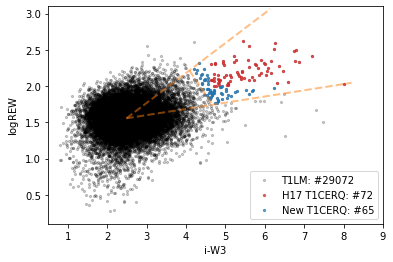

In [29]:
# plotting the population of H17 T1CERQs and new T1CERQs

ERQ_0 = data_0[(rew_0>=2) & (iW3_0>=4.6)]
ERQ_0_C = np.median(ERQ_0, axis=0)
Main_center_0 = np.median(data_0, axis=0)
mask1=[]
for i in range(len(data)):
    mask1.append(erqMedSpec.in_triangle(A_original, B_original, Main_center_0, data_0[i,:], 1e-8))

m_boundary = (P_intersect_original_A[1] -P_intersect_original_B[1])/(P_intersect_original_A[0] -P_intersect_original_B[0])
mask2 = (data_0[:,1] - P_intersect_original_A[1] - m_boundary*(data_0[:,0]-P_intersect_original_A[0])>=0)
ERQmask= (iW3_0>=4.6) & (rew_0>=2)
ERQNewMask= (mask1) & (mask2) & (~ERQmask)


P_intersect_original = P_intersect*(rangeData) + minData
plt.scatter(data_0[:,0], data_0[:,1], alpha=0.2, s=5, c='k', label ='T1LM: #%d'%len(data))
plt.scatter(data_0[ERQmask,0], data_0[ERQmask,1], s=5, c= 'C3', label ='H17 T1CERQ: #%d'%np.int32(np.sum(ERQmask)), alpha=0.7)
plt.scatter(data_0[ERQNewMask,0], data_0[ERQNewMask,1], s=5, c='C0', label ='New T1CERQ: #%d'%np.int32(np.sum(ERQNewMask)), alpha=0.7)

plt.plot([Main_center_0[0], A_original[0]], [Main_center_0[1], A_original[1]], c='C1', ls='--', lw=2, alpha=0.5)
plt.plot([Main_center_0[0], B_original[0]], [Main_center_0[1], B_original[1]], c='C1', ls='--', lw=2, alpha=0.5)
plt.plot([P_intersect_original_A[0], P_intersect_original_B[0]], [P_intersect_original_A[1], P_intersect_original_B[1]], c='C1', ls='--', lw=2, alpha=0.5)
plt.xlabel('i-W3')
plt.ylabel(r'$\log$REW')
plt.xlim(0.5,9)
plt.ylim(0.1,3.1)
plt.legend()
plt.savefig(dir+'2d-Boundary.png', dpi=200)

In [30]:
! cp 2D-Analysis/2d-Boundary.png ../../erqPaper/fig

In [31]:
#  median spectra of the new T1CERQs and H17 T1CERQs
medSpec = erqMedSpec.stacker(z_dr12[ERQNewMask], plate[ERQNewMask], mjd[ERQNewMask], fiber[ERQNewMask])
np.savetxt(dir+'med-spec-ERQ-new.txt', medSpec)

medSpec = erqMedSpec.stacker(z_dr12[ERQmask], plate[ERQmask], mjd[ERQmask], fiber[ERQmask])
np.savetxt(dir+'med-spec-ERQ-0.txt', medSpec)

  0%|          | 0/65 [00:00<?, ?it/s]


FileNotFoundError: [Errno 2] No such file or directory: '/media/reza/My Passport/erq/fred/sdss/7168/spec-7168-56625-0676.fits'

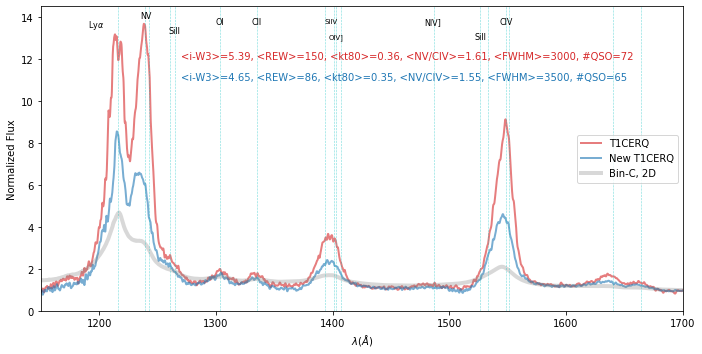

In [32]:
#ploting med spec of newERQs and H17 ERQs
c = ['C0', 'C3']
dir = '2D-Analysis/'
# -----------
step = 1.00015
bb = np.arange(0,8813,1)
wgrid = 800.0 * step**bb
nw = len(bb)
c_ind=-1
lambda_min = 1150; lambda_max = 1700
fig = plt.figure(figsize=(11.5,5.6))
ymax=14.5
ymin=0.02*ymax
fs=8
fs1=7
y_median = 0.95*ymax
med_step=.8
legend_loc=7
plt.xlim(lambda_min,lambda_max)
plt.ylim(ymin, ymax)
x_median=lambda_min+200
# Bin C med Spec

ind = (wgrid>lambda_min) & (wgrid<lambda_max)
from line_db import line_db
from matplotlib import cm
from scipy import ndimage

plt.ylabel('Normalized Flux')
plt.xlabel(r'$\lambda  (\AA)$')


medSpec=np.loadtxt(dir+ 'med-spec-ERQ-0.txt')

SmoothedMedSpec = ndimage.filters.gaussian_filter1d(medSpec,2.0)

plt.plot(wgrid[ind],  SmoothedMedSpec[ind], lw = 2., c='C3', 
                         label='T1CERQ', alpha=0.6)    


plt.text(1270, 12, '<i-W3>=%.2f, <REW>=%d, <kt80>=%.2f, <NV/CIV>=%.2f, <FWHM>=%d, #QSO=%d' %(np.median(iW3_0[ERQmask]), 
                                                                                    np.round(np.median(10**rew_0[ERQmask])/100,2)*100, 
                                                                         np.median(kt80_0[ERQmask]), np.median(frat_0[ERQmask]),
                                                                         np.round(np.median(fwhm_0[ERQmask])/10000,2)*10000, np.int32(np.sum(ERQmask))), color='C3')


medSpec=np.loadtxt(dir+ 'med-spec-ERQ-new.txt')
SmoothedMedSpec = ndimage.filters.gaussian_filter1d(medSpec,2.0)
plt.plot(wgrid[ind],  SmoothedMedSpec[ind], lw = 2., c='C0', 
                         label='New T1CERQ', alpha=0.6)

plt.text(1270, 11, '<i-W3>=%.2f, <REW>=%d, <kt80>=%.2f, <NV/CIV>=%.2f, <FWHM>=%d, #QSO=%d' %(np.median(iW3_0[ERQNewMask]), np.median(10**rew_0[ERQNewMask]), 
                                                                         np.median(kt80_0[ERQNewMask]), np.median(frat_0[ERQNewMask]),
                                                                         np.round(np.median(fwhm_0[ERQNewMask])/10000,2)*10000, np.int32(np.sum(ERQNewMask))), color='C0')


medSpec=np.loadtxt(dir+ 'med-spec-wdg-0-bin-0.txt')
plt.plot(wgrid[ind],  medSpec[ind], lw = 4, c='grey', 
                 label='Bin-C, 2D', alpha=0.3)
plt.legend(loc=7)
#     plt.title('Wedge: %d' %wdg)
line_db( ymax, fs, fs1, 3) 
fig_path = dir + 'med-spec-ERQ-old-new-%d-%d.png'%(lambda_min, lambda_max)

plt.savefig(fig_path, format='png', dpi=200, bbox_inches='tight')
plt.show()

In [33]:
! cp 2D-Analysis/med-spec-ERQ-old-new-1150-1700.png ../../erqPaper/fig